Dataset Shape: (150, 5)

Summary Statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Missing Values:
 sepal le

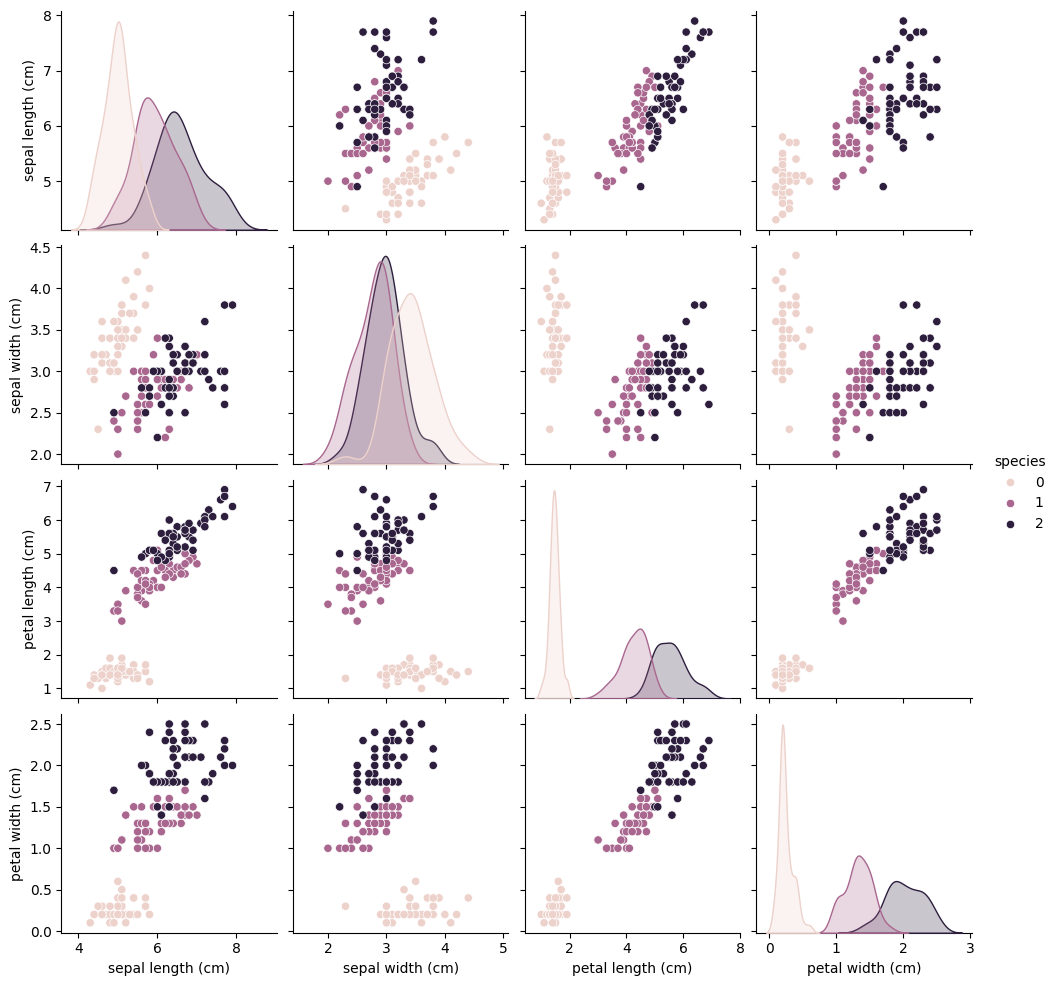

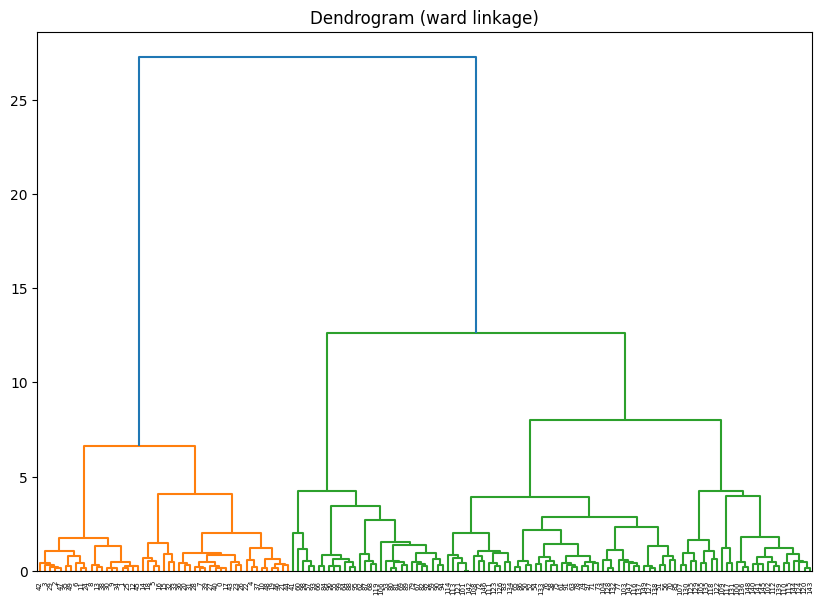

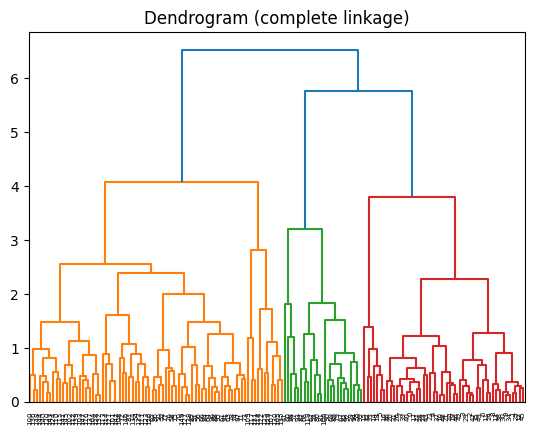

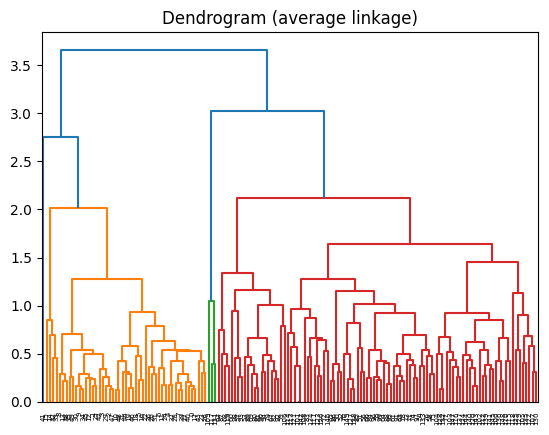

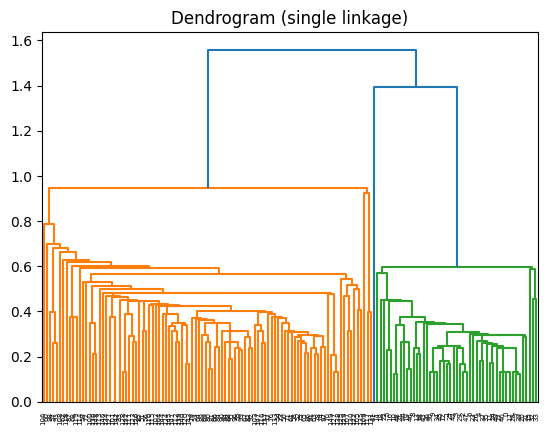

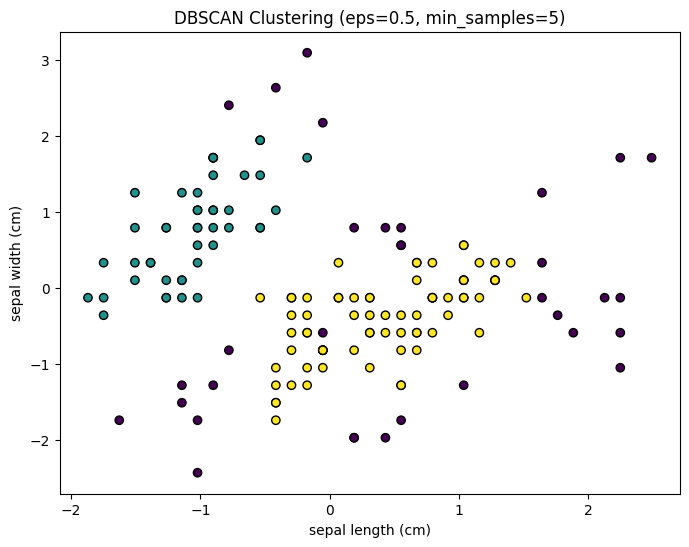

DBSCAN Clustering Results (eps=0.5, min_samples=5):
  1    71
 0    45
-1    34
Name: count, dtype: int64


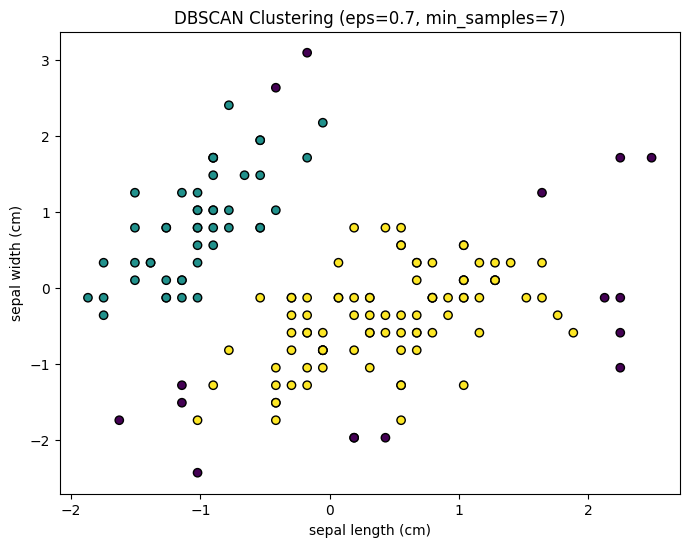

DBSCAN Clustering Results (eps=0.7, min_samples=7):
  1    87
 0    47
-1    16
Name: count, dtype: int64


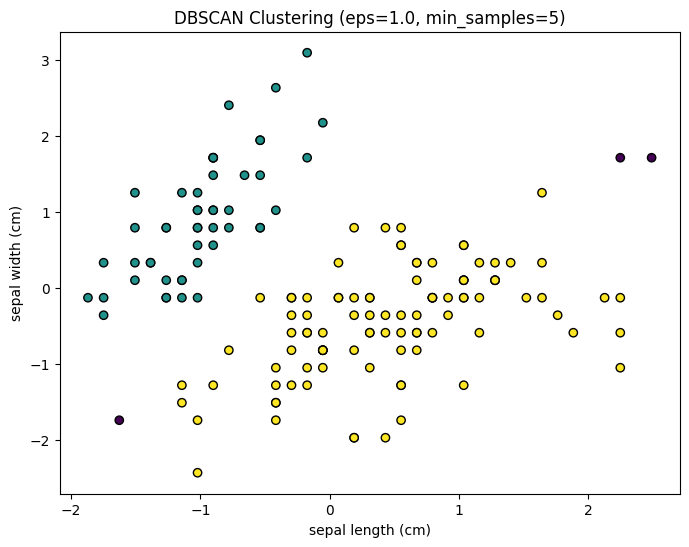

DBSCAN Clustering Results (eps=1.0, min_samples=5):
  1    98
 0    49
-1     3
Name: count, dtype: int64


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

# Statistical Summary
print("Dataset Shape:", df.shape)
print("\nSummary Statistics:\n", df.describe())

# Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Visualize Feature Distributions
sns.pairplot(df, hue="species", diag_kind='kde')
plt.show()

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['species']))
Y = df['species']

# Agglomerative Clustering with different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
plt.figure(figsize=(10, 7))
for method in linkage_methods:
    Z = linkage(X, method=method)
    plt.title(f'Dendrogram ({method} linkage)')
    dendrogram(Z)
    plt.show()

# Apply Agglomerative Clustering
for method in linkage_methods:
    agglom = AgglomerativeClustering(n_clusters=3, linkage=method)
    df[f'Cluster_{method}'] = agglom.fit_predict(X)

# DBSCAN Clustering
eps_values = [0.5, 0.7, 1.0]
min_samples_values = [5, 7, 5]

for eps, min_samples in zip(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    df[f'DBSCAN_eps{eps}_min{min_samples}'] = dbscan.fit_predict(X)

    # Visualize Clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis', edgecolors='k')
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])
    plt.show()

    print(f"DBSCAN Clustering Results (eps={eps}, min_samples={min_samples}):\n", pd.Series(dbscan.labels_).value_counts())

Agglomerative Clustering: ARI = 1.000, Silhouette Score = 0.848
DBSCAN: ARI = 0.959, Silhouette Score = 0.782


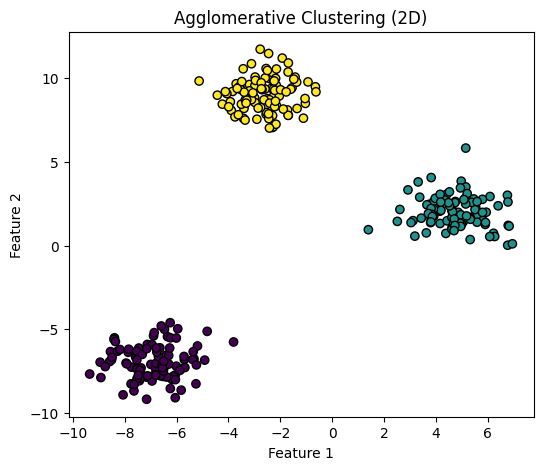

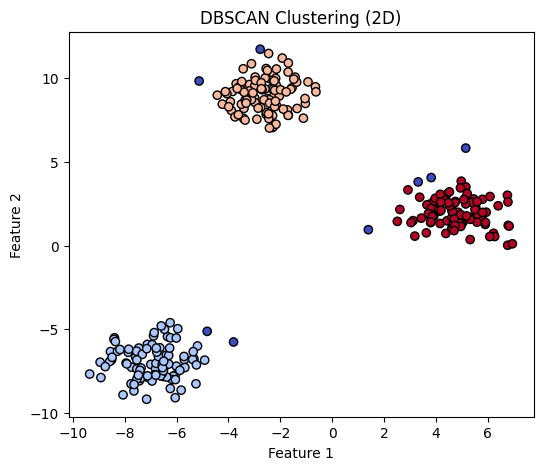

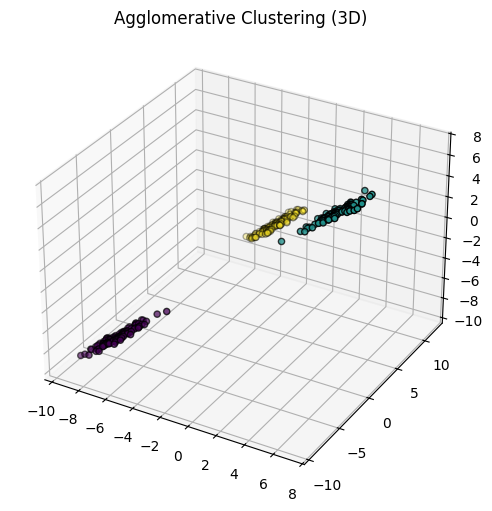

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
y_pred_agglo = agglo.fit_predict(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(X)

# Calculate metrics
ari_agglo = adjusted_rand_score(y_true, y_pred_agglo)
silhouette_agglo = silhouette_score(X, y_pred_agglo)
ari_dbscan = adjusted_rand_score(y_true, y_pred_dbscan)
silhouette_dbscan = silhouette_score(X, y_pred_dbscan) if len(set(y_pred_dbscan)) > 1 else -1

# Print metrics
print(f"Agglomerative Clustering: ARI = {ari_agglo:.3f}, Silhouette Score = {silhouette_agglo:.3f}")
print(f"DBSCAN: ARI = {ari_dbscan:.3f}, Silhouette Score = {silhouette_dbscan:.3f}")

# 2D Plot for Agglomerative Clustering
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_agglo, cmap='viridis', edgecolor='k')
plt.title("Agglomerative Clustering (2D)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 2D Plot for DBSCAN
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_dbscan, cmap='coolwarm', edgecolor='k')
plt.title("DBSCAN Clustering (2D)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 3D Plot for Agglomerative Clustering
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 0], c=y_pred_agglo, cmap='viridis', edgecolor='k')
ax.set_title("Agglomerative Clustering (3D)")
plt.show()
